In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
### Reading Data
df=pd.read_excel('Data_Train.xlsx')
### first 5 rows of data
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
### To display all columns we can use display.max_columns
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
### last 5 rows of data
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
### size of data
df.shape

(10683, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
### finding any null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
### Dropping NAN Values
df.dropna(inplace=True)

In [10]:
df.shape

(10682, 11)

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# **EDA**

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
### first we have to convert Date_of_journey to timestamp data type format
### .dt.day method extract on day of that day
df['Journy_day']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [15]:
### now same for month
### .dt.month method extract on month of that day
df['Journy_month']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_day,Journy_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
### we are not using year because all rows in dataset have 2019 year.

In [17]:
### we dont require now "Date_of_Journey" column..

df.drop('Date_of_Journey',inplace=True,axis=1)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_day,Journy_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [18]:
### Converting Dep_Time to proper format

### .dt.hour method extract on hour from that time
### .dt.minute method extract on minutes from that time
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_day,Journy_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
### dropping 'Dep_Time' feature

df.drop('Dep_Time',inplace=True,axis=1)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_day,Journy_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [20]:
### Same for "Arrival_Time" Feature
df['Arr_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
### Remoing Arrival_Time Feature
df.drop('Arrival_Time',inplace=True,axis=1)

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
### In 'Duration' column, making each data in hr and min format.
duration=list(df['Duration'])
duration    

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [22]:
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]


In [23]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [24]:

### separating Duration in duration_hours and duration_minutes
duration_hours=[]
duration_minutes=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_minutes.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [25]:
duration_hours

[2,
 7,
 19,
 5,
 4,
 2,
 15,
 21,
 25,
 7,
 13,
 2,
 2,
 12,
 2,
 26,
 4,
 22,
 23,
 20,
 5,
 15,
 2,
 2,
 13,
 15,
 5,
 5,
 2,
 2,
 2,
 13,
 2,
 22,
 5,
 10,
 5,
 2,
 6,
 11,
 11,
 8,
 22,
 2,
 12,
 2,
 2,
 2,
 16,
 19,
 3,
 25,
 2,
 3,
 2,
 16,
 15,
 2,
 6,
 25,
 12,
 27,
 10,
 10,
 2,
 10,
 2,
 1,
 13,
 2,
 1,
 26,
 7,
 13,
 5,
 2,
 2,
 1,
 19,
 2,
 14,
 2,
 22,
 9,
 10,
 21,
 5,
 18,
 12,
 18,
 9,
 11,
 17,
 13,
 2,
 2,
 2,
 3,
 1,
 16,
 12,
 12,
 7,
 24,
 2,
 8,
 7,
 14,
 30,
 19,
 15,
 2,
 12,
 10,
 5,
 15,
 16,
 10,
 2,
 11,
 2,
 1,
 14,
 20,
 2,
 23,
 18,
 16,
 2,
 2,
 8,
 16,
 3,
 2,
 14,
 23,
 21,
 21,
 2,
 10,
 8,
 8,
 5,
 8,
 11,
 27,
 8,
 20,
 4,
 8,
 2,
 24,
 2,
 12,
 12,
 23,
 16,
 2,
 25,
 26,
 28,
 2,
 25,
 9,
 4,
 15,
 1,
 2,
 9,
 2,
 22,
 3,
 11,
 9,
 12,
 17,
 5,
 25,
 20,
 13,
 18,
 1,
 9,
 16,
 2,
 4,
 5,
 24,
 2,
 2,
 4,
 25,
 6,
 3,
 18,
 2,
 12,
 19,
 2,
 8,
 9,
 2,
 3,
 2,
 12,
 2,
 9,
 2,
 9,
 29,
 2,
 5,
 9,
 10,
 4,
 1,
 11,
 2,
 2,
 10,
 2,
 10,
 1,
 9,
 

In [26]:
duration_minutes

[50,
 25,
 0,
 25,
 45,
 25,
 30,
 5,
 30,
 50,
 15,
 35,
 15,
 10,
 35,
 35,
 30,
 35,
 0,
 35,
 10,
 20,
 50,
 55,
 20,
 10,
 45,
 55,
 50,
 15,
 15,
 25,
 50,
 0,
 30,
 25,
 15,
 30,
 15,
 55,
 5,
 30,
 5,
 45,
 0,
 50,
 50,
 15,
 5,
 55,
 15,
 20,
 50,
 0,
 50,
 15,
 5,
 15,
 30,
 5,
 25,
 20,
 15,
 30,
 15,
 25,
 50,
 30,
 20,
 15,
 25,
 30,
 20,
 30,
 0,
 45,
 50,
 30,
 5,
 15,
 50,
 40,
 10,
 35,
 0,
 20,
 25,
 45,
 20,
 0,
 15,
 5,
 30,
 20,
 35,
 25,
 40,
 0,
 25,
 35,
 20,
 15,
 30,
 0,
 45,
 55,
 10,
 30,
 20,
 55,
 0,
 55,
 45,
 10,
 55,
 25,
 5,
 10,
 40,
 55,
 40,
 25,
 5,
 15,
 25,
 10,
 10,
 0,
 50,
 20,
 0,
 55,
 10,
 45,
 0,
 50,
 40,
 15,
 45,
 50,
 0,
 15,
 25,
 35,
 50,
 35,
 25,
 55,
 50,
 10,
 20,
 25,
 50,
 20,
 15,
 35,
 35,
 50,
 45,
 10,
 50,
 45,
 15,
 20,
 30,
 25,
 30,
 40,
 10,
 45,
 35,
 5,
 30,
 30,
 10,
 35,
 5,
 50,
 0,
 0,
 25,
 30,
 30,
 0,
 20,
 30,
 45,
 10,
 35,
 45,
 55,
 35,
 20,
 5,
 40,
 15,
 10,
 25,
 50,
 25,
 15,
 50,
 15,
 50,
 20,
 55,
 

In [27]:
df['duration_hours']=duration_hours
df['duration_minutes']=duration_minutes
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [28]:
### Dropping 'Duration' column

df.drop('Duration',inplace=True,axis=1)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [29]:
### Now only categorical data are present in our dataset

In [30]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

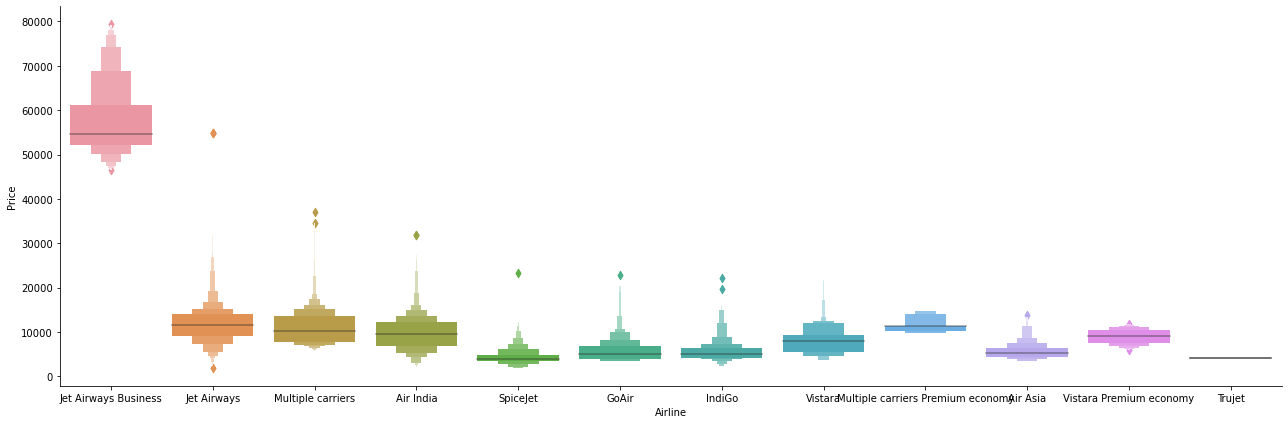

In [31]:
sn.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [32]:
df[['Airline']]

,Airline
0,IndiGo
1,Air India
2,Jet Airways
3,IndiGo
4,IndiGo
...,...
10678,Air Asia
10679,Air India
10680,Jet Airways
10681,Vistara


In [33]:
Airline=df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [34]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

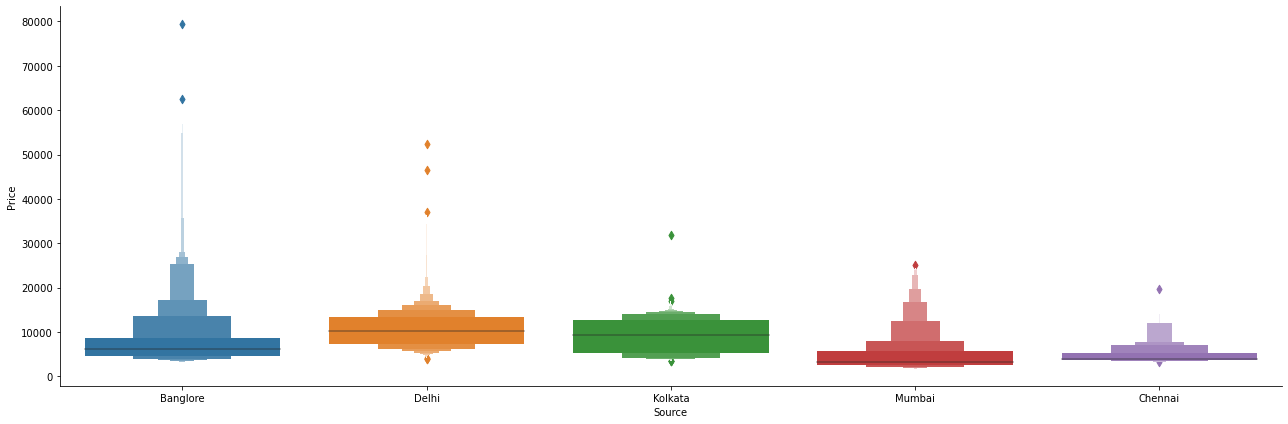

In [35]:
sn.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [36]:

Source=df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [37]:
### Same for Destination column
df['Destination'].value_counts()


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

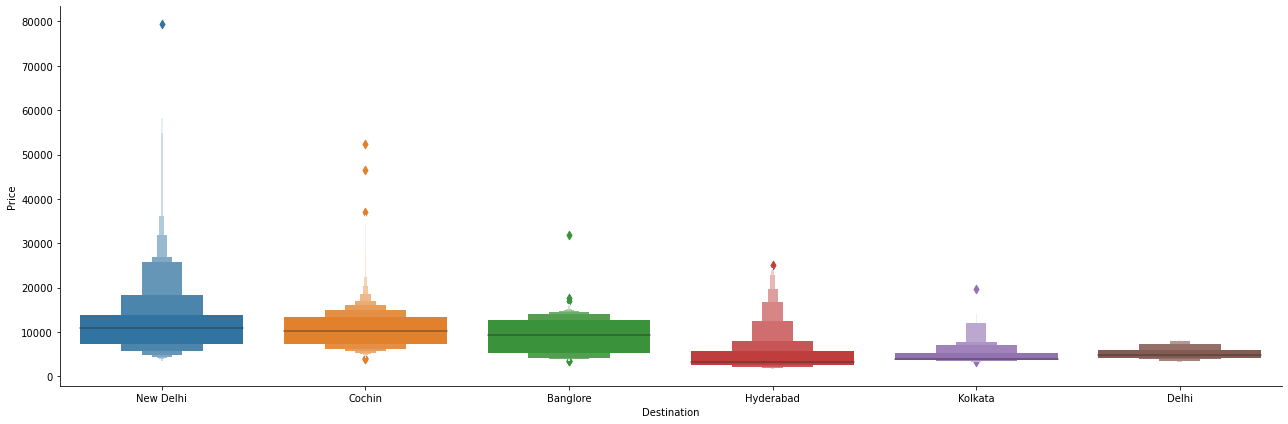

In [38]:
sn.catplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()


In [39]:
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [40]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [41]:
df['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [42]:
df['Additional_Info']

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object

In [43]:
### In our Dataset, Additional Info is not giving any info.Let's drop it.
### Route and Total_Stops both table giving same data. Ex. Route :- CCU → IXR → BBI → BLR 
###                                                        Total_Stops :- 2 stops
#### So, we dropping Route Column.

df.drop(['Route','Additional_Info'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [44]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [45]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [46]:
df.tail(10)

,Airline,Source,Destination,Total_Stops,Price,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_minutes
10673,Jet Airways,Delhi,Cochin,2 stops,16704,27,5,13,25,4,25,15,0
10674,Jet Airways,Banglore,New Delhi,1 stop,11087,12,3,20,35,21,20,24,45
10675,Air India,Mumbai,Hyderabad,non-stop,3100,9,6,6,20,7,40,1,20
10676,Multiple carriers,Delhi,Cochin,1 stop,9794,1,5,10,20,19,0,8,40
10677,SpiceJet,Banglore,Delhi,non-stop,3257,21,5,5,55,8,35,2,40
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40
10682,Air India,Delhi,Cochin,2 stops,11753,9,5,10,55,19,15,8,20


In [47]:
### In dataset, Price is depend on Total_stops. So Total_stop is ordinal categorical.
### Performing LabelEncoder
df.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)

In [48]:
### Adding or concating all column that we made in above cells.

In [49]:

df=pd.concat([df,Airline,Source,Destination],axis=1)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
### Now dropping Airline,Source,Destination

df.drop(['Airline','Source','Destination'],axis=1,inplace=True)
df.head()

,Total_Stops,Price,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
### Now all columns are in Numerical or in numbers.
### Size of data
df.shape

(10682, 30)

In [52]:
### Importing Test_data.

### Here,test_data is not combine in train_data. we use it separately because to solve data leakage problem.
### If we use combined data then while train_test_split during splitting machine can get some test_data.
### In real time, we don't use combined data

In [53]:
test_set=pd.read_excel('Test_set.xlsx')
test_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [54]:
test_set.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [55]:
### Again doing same preprocessing steps like above train_set.

test_set['Journy_day']=pd.to_datetime(test_set['Date_of_Journey'],format="%d/%m/%Y").dt.day
test_set['Journy_month']=pd.to_datetime(test_set['Date_of_Journey'],format="%d/%m/%Y").dt.month
test_set.drop('Date_of_Journey',inplace=True,axis=1)

test_set['Dep_hour']=pd.to_datetime(test_set['Dep_Time']).dt.hour
test_set['Dep_min']=pd.to_datetime(test_set['Dep_Time']).dt.minute
test_set.drop('Dep_Time',inplace=True,axis=1)

test_set['Arr_hour']=pd.to_datetime(test_set['Arrival_Time']).dt.hour
test_set['Arr_min']=pd.to_datetime(test_set['Arrival_Time']).dt.minute
### Remoing Arrival_Time Feature
test_set.drop('Arrival_Time',inplace=True,axis=1)


duration=list(test_set['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]

### separating Duration in duration_hours and duration_minutes
duration_hours=[]
duration_minutes=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_minutes.append(int(duration[i].split(sep="m")[0].split()[-1]))
    
test_set['duration_hours']=duration_hours
test_set['duration_minutes']=duration_minutes
test_set.drop('Duration',inplace=True,axis=1)


Airline=test_set[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Source=test_set[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Destination=test_set[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
test_set.drop(['Route','Additional_Info'],axis=1,inplace=True)

test_set.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)
test_set=pd.concat([test_set,Airline,Source,Destination],axis=1)
test_set.drop(['Airline','Source','Destination'],axis=1,inplace=True)

test_set.head()

,Total_Stops,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
test_set.shape

(2671, 28)

# **Feature Selection Process**

In [57]:
df.head()

,Total_Stops,Price,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
### Independant Features assigning to x
x=df.iloc[:,np.r_[0:1,2:30]]
x.head()

,Total_Stops,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
x.shape

(10682, 29)

In [60]:
### Dependent Feature assign to y
y=df.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [61]:
### Correlation

In [62]:
x.corr()

,Total_Stops,Journy_day,Journy_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,-0.274351,0.002519,-0.120447,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Journy_day,-0.009451,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,-0.032490,-0.003122,0.007281,-0.017304,-0.031713,0.042163,0.030839,0.022154,-0.008569,-0.013169,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Journy_month,0.054383,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,-0.045981,-0.004494,-0.048504,0.059735,-0.034787,0.053685,-0.051222,-0.011977,-0.014199,-0.017252,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Dep_hour,-0.061476,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_min,-0.002618,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,-0.045688,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arr_hour,0.038140,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,0.088872,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arr_min,-0.106940,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,0.061231,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
duration_hours,0.739916,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,0.261707,-0.094044,-0.346230,0.307196,-0.011847,-0.008070,-0.002271,-0.263844,-0.008253,-0.020358,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
duration_minutes,-0.136706,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,-0.033427,0.067215,0.119817,-0.084052,-0.002322,-0.118766,-0.006853,0.041319,-0.007610,0.041952,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866
Airline_Air India,0.271094,-0.032490,-0.045981,-0.012879,-0.045688,0.088872,0.061231,0.261707,-0.033427,1.000000,-0.060221,-0.215977,-0.332324,-0.010497,-0.157223,-0.015456,-0.127510,-0.004284,-0.095939,-0.007421,-0.051068,0.001257,0.023606,0.022268,0.001257,-0.068370,0.022268,-0.051068,0.053072


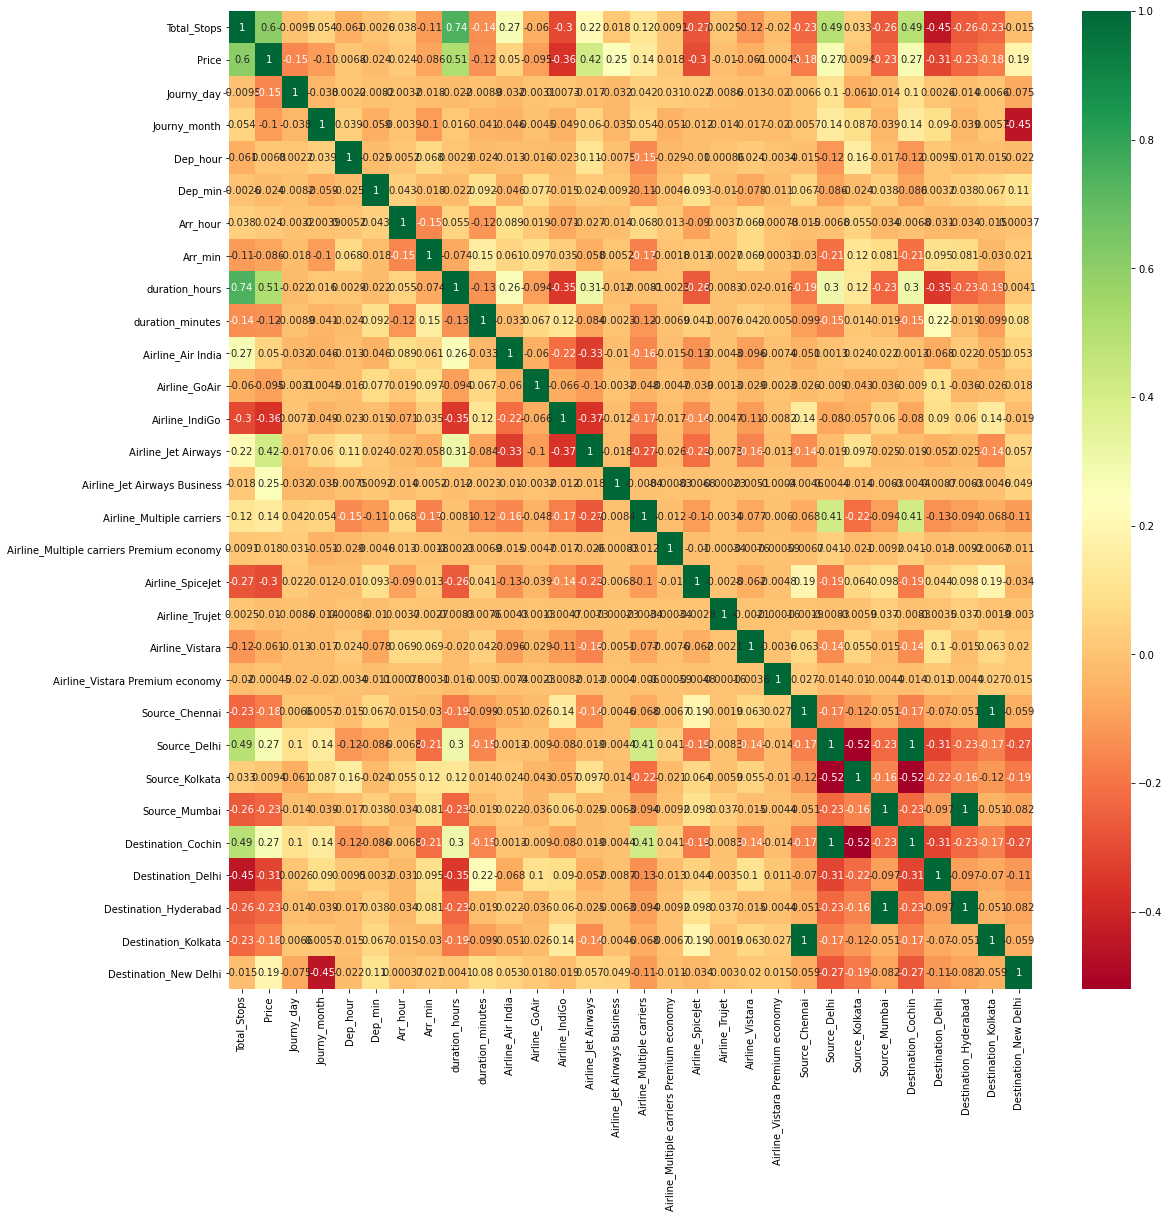

In [63]:
plt.figure(figsize=(18,18))
sn.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [64]:
#### ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [65]:
selection.feature_importances_

array([2.07778702e-01, 1.43192166e-01, 5.35575919e-02, 2.44079053e-02,
       2.11856558e-02, 2.80961290e-02, 1.90749668e-02, 1.34325702e-01,
       1.76733942e-02, 1.03507999e-02, 1.95514438e-03, 1.92568739e-02,
       1.44812658e-01, 6.75668812e-02, 1.80797025e-02, 8.40576270e-04,
       3.06064004e-03, 9.21815467e-05, 4.99651118e-03, 8.10690966e-05,
       5.60323090e-04, 1.33318108e-02, 3.32977399e-03, 5.86447824e-03,
       9.76033257e-03, 1.45048351e-02, 6.91899451e-03, 5.44204260e-04,
       2.47999972e-02])

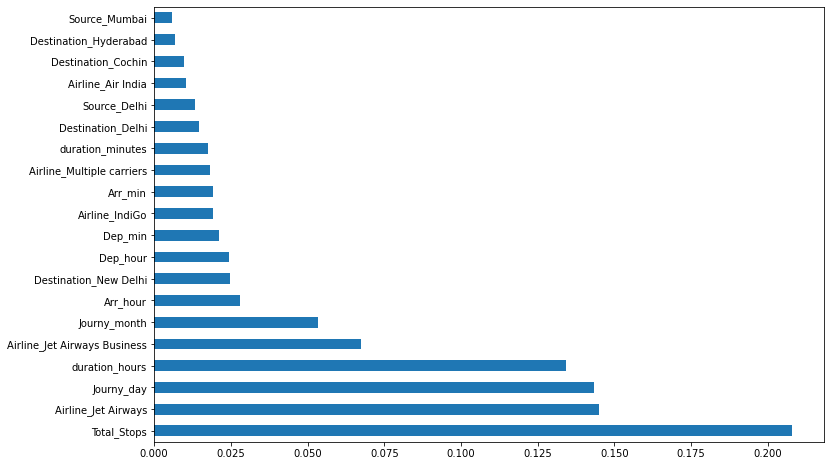

In [66]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting Model:- Random Forest Regressor

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [68]:
x_train.shape

(8545, 29)

In [69]:
y_train.shape

(8545,)

In [70]:
### Importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [71]:
### predicting x_test
y_pred=model.predict(x_test)

In [72]:
### Scoring Train and Test

In [73]:
model.score(x_train,y_train)

0.9540988355772893

In [74]:
model.score(x_test,y_test)

0.8120658989204352

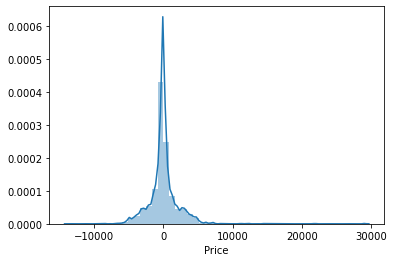

In [75]:
sn.distplot(y_test-y_pred)
plt.show()

Text(0, 0.5, 'y_pred')

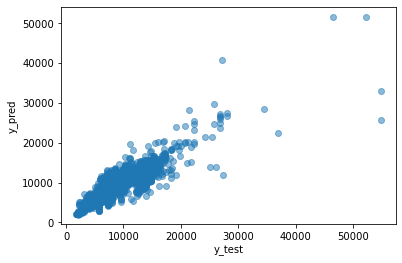

In [76]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [77]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [78]:
print('MAE :- ',mean_absolute_error(y_test,y_pred))
print('MSE :- ',mean_squared_error(y_test,y_pred))
print('RMSE :- ',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE :-  1243.6289321769063
MSE :-  4409530.696167807
RMSE :-  2099.8882580194136


In [79]:
print('R2Score :- ',r2_score(y_test,y_pred))

R2Score :-  0.8120658989204352


# HyperParameter Tunnig :- Randomized SeachCV 

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
n_estimators=[int(i) for i in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(i) for i in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]


In [82]:
### Random_grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf
}

In [83]:
rf_random=RandomizedSearchCV(estimator=model,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [84]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [86]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [87]:
prediction=rf_random.predict(x_test)
prediction

array([12643.97213472,  5986.51604661,  3569.14515058, ...,
       12368.40828289, 11771.50020514,  4011.14576051])

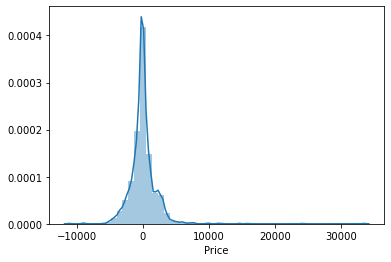

In [88]:
sn.distplot(y_test-prediction)
plt.show()


Text(0, 0.5, 'prediction')

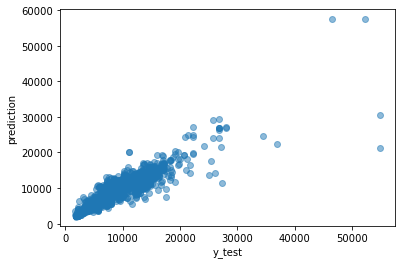

In [89]:

plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')


In [90]:

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE :- ',mean_absolute_error(y_test,prediction))
print('MSE :- ',mean_squared_error(y_test,prediction))
print('RMSE :- ',np.sqrt(mean_squared_error(y_test,prediction)))

print('R2Score :- ',r2_score(y_test,prediction))

MAE :-  1204.9796925923922
MSE :-  4070243.461937149
RMSE :-  2017.4844390817861
R2Score :-  0.8265263133650667


# Saving Model

In [91]:
import pickle

In [94]:
file=open('flight_rf1.pkl','wb')
pickle.dump(rf_random,file)